# Tailorit - 1 Feature Clustering

### Imports and jupyter settings

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import tailor
from tailor.clustering import *
from tailor.visualization import *

### Load data

In [3]:
data = tailor.load_data()

### Rank features by their inter-feature variance

In [4]:
feats = ['color', 'brand', 'Abteilung', 'WHG', 'WUG', 'season', 'month']
ranking.rank_features(data, distance.absolute, feats, 'norm_revenue')

,feature,variance,num_characteristics
4,WUG,0.178930,152
3,WHG,0.123187,43
1,brand,0.114236,75
6,month,0.106810,12
2,Abteilung,0.061076,7
5,season,0.047494,4
0,color,0.016031,40


A high score indicates feature characteristics are far apart, and thus better for clustering.

### Select a feature to cluster by

In [9]:
feat = 'WUG'
target_value = 'norm_revenue'
min_cluster_size = 50

### Run the Clustering Algorithm

In [6]:
df = build_clusters(data, feat, distance.absolute, target_value)
cluster_characteristics(df, feat)

,num_articles,num_characteristics,characteristics
cluster,,,
0,1807,32,"[WUG073, WUG139, WUG081, WUG102, WUG099, WUG06..."
1,6858,110,"[WUG138, WUG084, WUG006, WUG005, WUG020, WUG05..."
32,25,2,"[WUG059, WUG062]"
120,6,2,"[WUG087, WUG123]"
124,1,1,[WUG095]
136,9,3,"[WUG007, WUG008, WUG142]"
147,1,1,[WUG039]
151,1,1,[WUG004]


In [10]:
df = merge_min_clusters(df, feat, min_cluster_size, distance.absolute, target_value)
cluster_characteristics(df, feat)

,num_articles,num_characteristics,characteristics
cluster,,,
0,1842,38,"[WUG073, WUG139, WUG081, WUG102, WUG099, WUG06..."
1,6866,114,"[WUG138, WUG084, WUG006, WUG005, WUG020, WUG05..."


### Plot the article-count curves before and after the clustering

Number Characteristics:  152


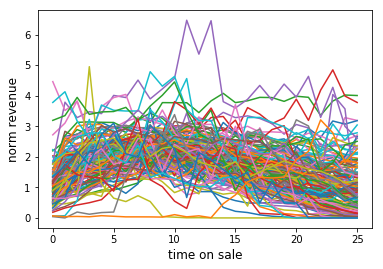

In [11]:
print("Number Characteristics: ", len(df[feat].unique()))
plot_feature_characteristics(df, feat, target_value, legend=False);

Number of Clusters:  2


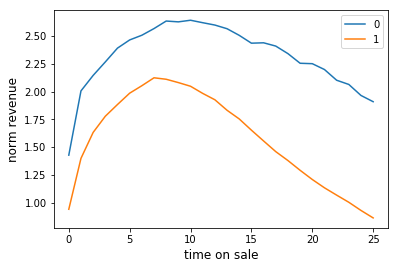

In [12]:
print("Number of Clusters: ", len(df['cluster'].unique()))
plot_feature_characteristics(df, 'cluster', target_value);

### Plot characteristics that are included in a specific Cluster

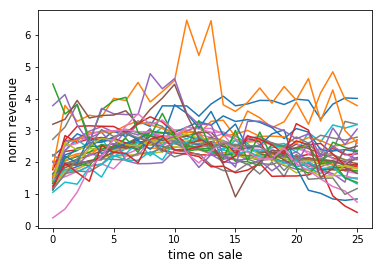

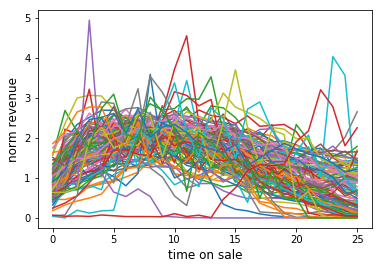

In [13]:
plot_cluster_characteristics(df, 0, feat, target_value, legend=False);
plot_cluster_characteristics(df, 1, feat, target_value, legend=False);

### Plot all articles that are included in a Cluster

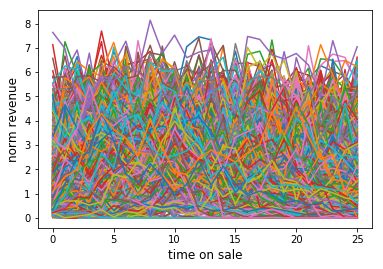

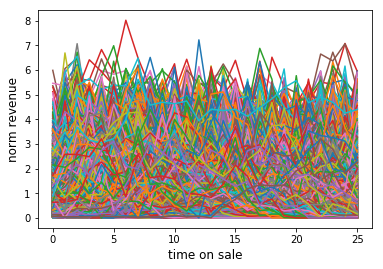

In [14]:
plot_cluster_articles(df, 0, target_value, legend=False);
plot_cluster_articles(df, 1, target_value, legend=False);